<a href="https://colab.research.google.com/github/angelocodes/Machine-Learning-tasks/blob/master/Segmentation_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(2853, 2775, 3)
(23751225, 1)
[[21]
 [ 6]
 [20]
 ...
 [20]
 [ 7]
 [15]]


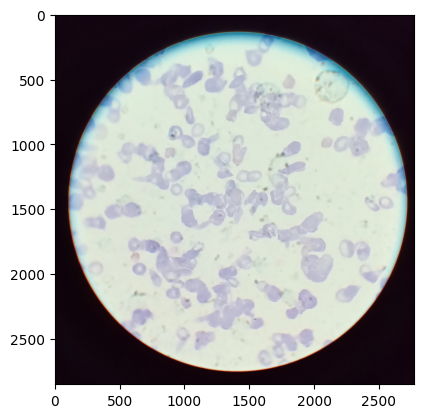

In [ ]:

from sklearn.cluster import KMeans
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('1.jpg')

print(image.shape)

X = image.reshape(-1, 1)
print(X.shape)
print(X)
plt.imshow(image)

In [ ]:
kmeans = KMeans(n_clusters=4,random_state=0, n_init=10).fit(X)
kmeans.cluster_centers_

array([[194.88178789],
       [ 13.79972557],
       [221.82786535],
       [124.67962286]])

In [ ]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
segmented_image = kmeans.cluster_centers_[kmeans.labels_]

In [ ]:
segmented_image

array([[13.79972557],
       [13.79972557],
       [13.79972557],
       ...,
       [13.79972557],
       [13.79972557],
       [13.79972557]])

In [ ]:
segmented_image = segmented_image.reshape(image.shape)

In [ ]:
segmented_image.shape

(2853, 2775, 3)

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load image
image = cv2.imread('1.jpg')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_mask = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY)


# Normalize the pixel values to a range of 0 to 1
gray_image = gray_image / 255.0


# Reshape the image to a 2D array of pixels
pixels = gray_image.reshape(-1, 1)

# Define the number of clusters
k = 5  # adjust this based on your specific needs

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(pixels)

# Replace pixel values with their cluster centroids
segmented_img = kmeans.cluster_centers_[kmeans.labels_].reshape(gray_image.shape)


In [ ]:
segmented_img

array([[0.04173457, 0.04173457, 0.04173457, ..., 0.04173457, 0.04173457,
        0.04173457],
       [0.04173457, 0.04173457, 0.04173457, ..., 0.04173457, 0.04173457,
        0.04173457],
       [0.04173457, 0.04173457, 0.04173457, ..., 0.04173457, 0.04173457,
        0.04173457],
       ...,
       [0.04173457, 0.04173457, 0.04173457, ..., 0.04173457, 0.04173457,
        0.04173457],
       [0.04173457, 0.04173457, 0.04173457, ..., 0.04173457, 0.04173457,
        0.04173457],
       [0.04173457, 0.04173457, 0.04173457, ..., 0.04173457, 0.04173457,
        0.04173457]])

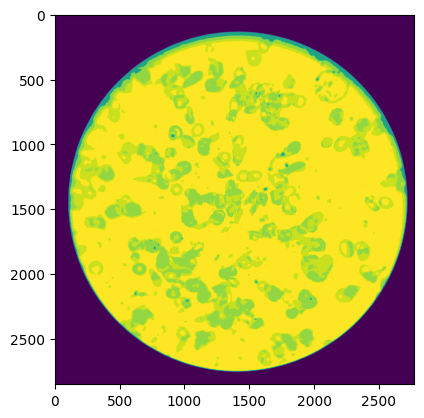

In [ ]:
plt.imshow(segmented_img)

In [ ]:
kmeans.inertia_

3173.569316456651

In [ ]:
binary_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
# Load image
image = cv2.imread('2.jpg')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, binary_mask = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY)
binary_mask
#image


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

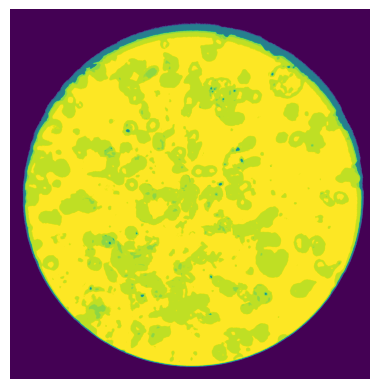

In [ ]:
from sklearn.mixture import GaussianMixture
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('1.jpg')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Normalize the pixel values to a range of 0 to 1
gray_image = gray_image / 255.0

# Reshape the image to a 2D array of pixels
pixels = gray_image.reshape(-1, 1)

# Define the number of components (clusters)
k = 5  # adjust this based on your specific needs

# Perform Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=k, random_state=0)
gmm.fit(pixels)

# Predict the most likely cluster for each pixel
labels = gmm.predict(pixels)

# Replace pixel values with the mean of the Gaussian component for each cluster
segmented_img = gmm.means_[labels].reshape(gray_image.shape)

# Display the segmented image
plt.imshow(segmented_img)
plt.axis('off')
plt.show()


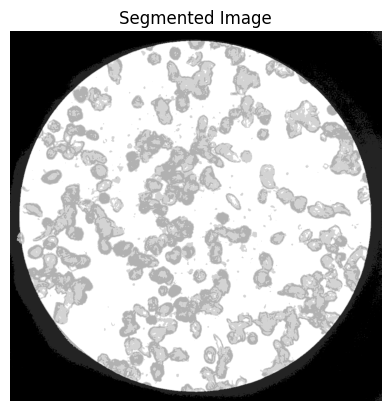

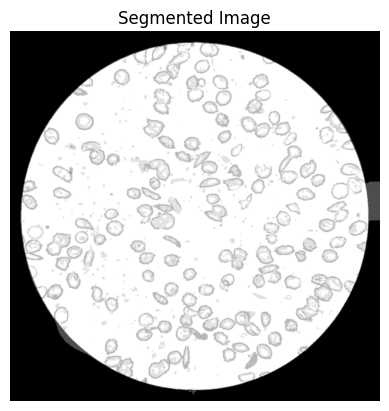

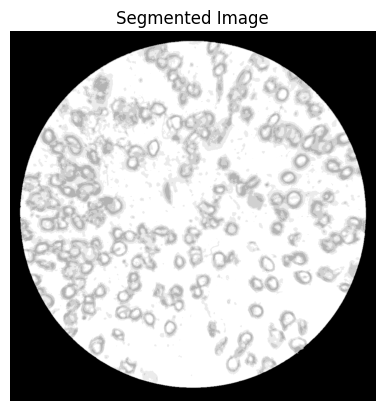

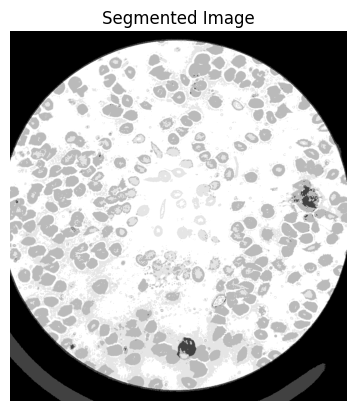

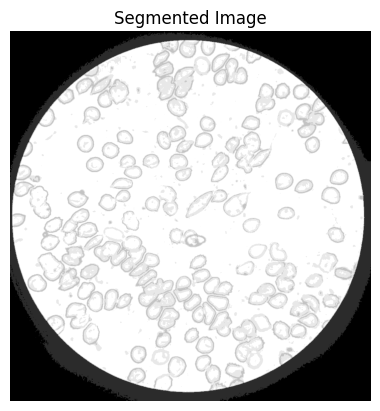

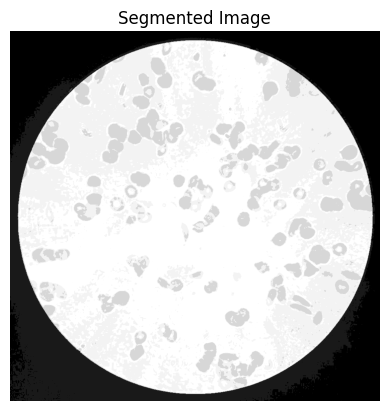

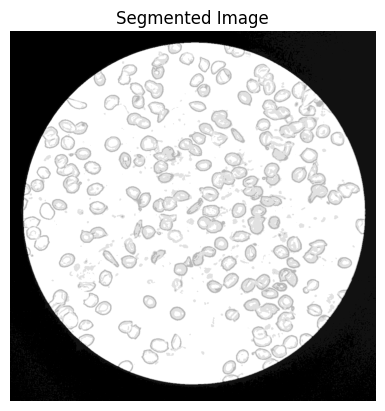

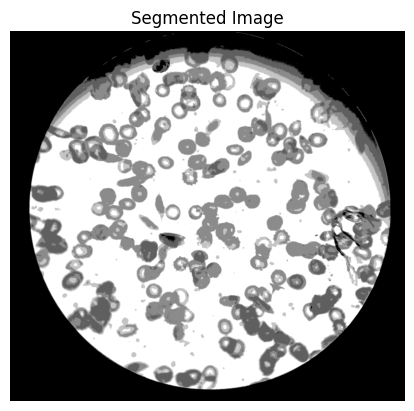

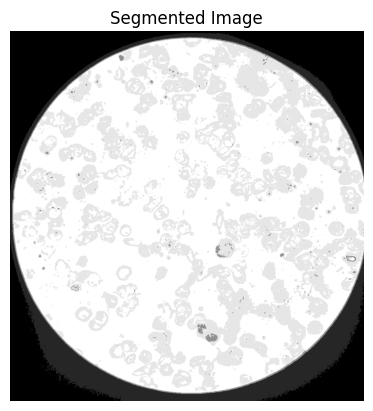

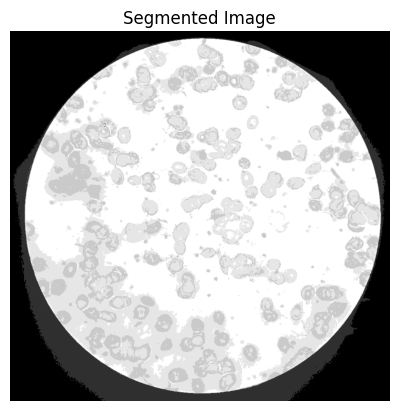

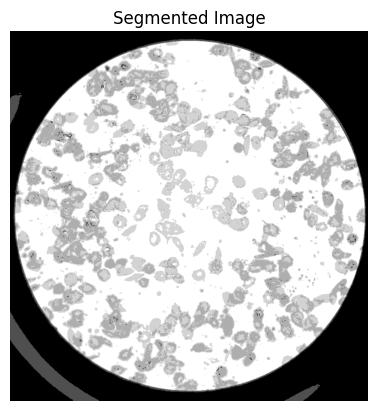

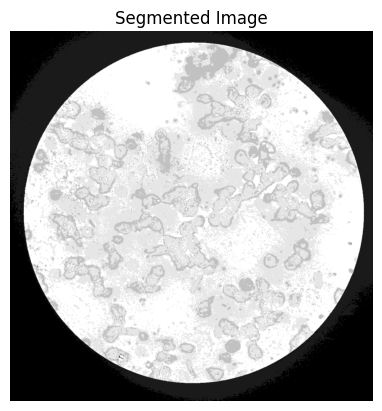

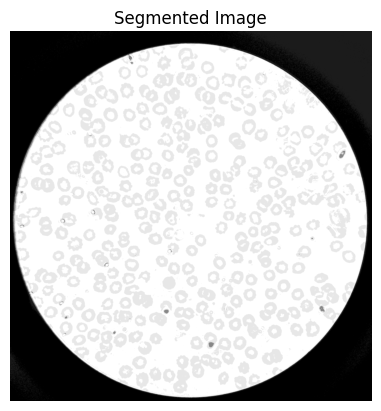

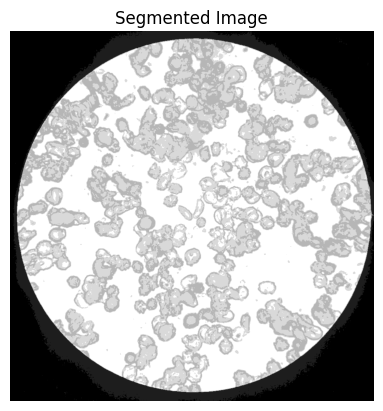

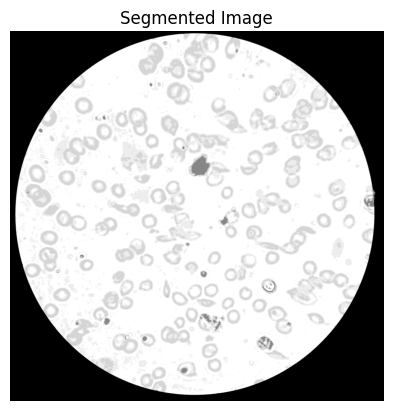

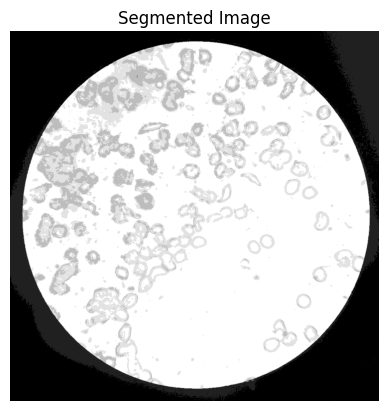

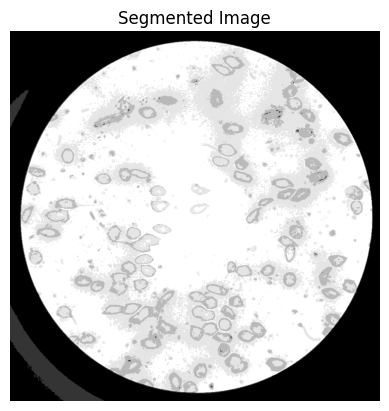

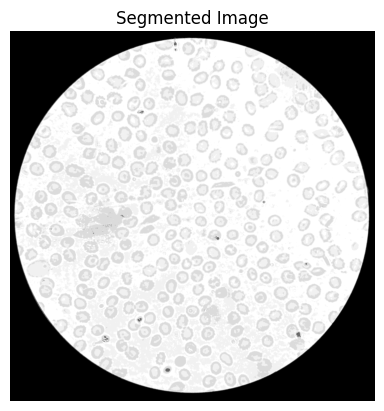

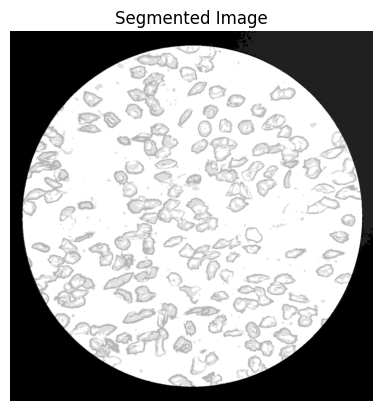

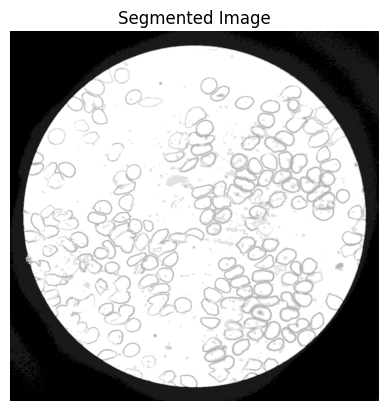

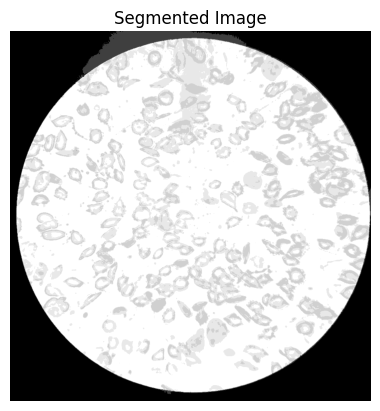

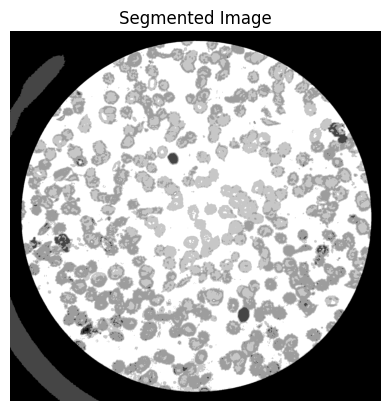

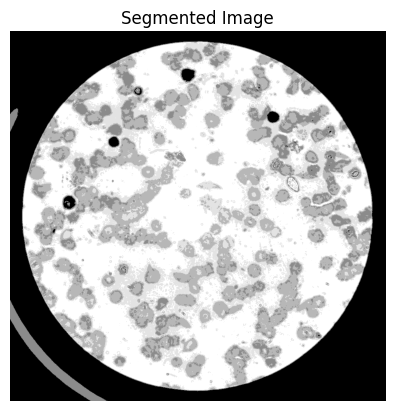

KeyboardInterrupt: 

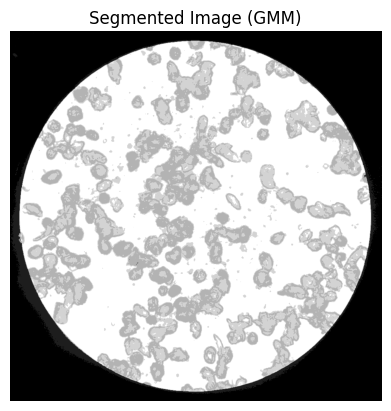

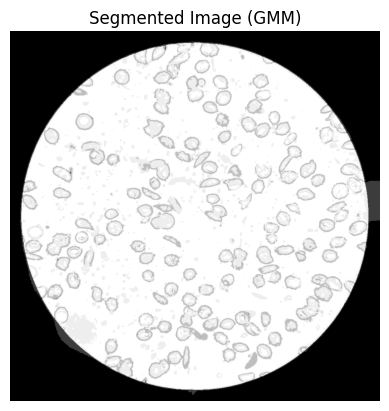

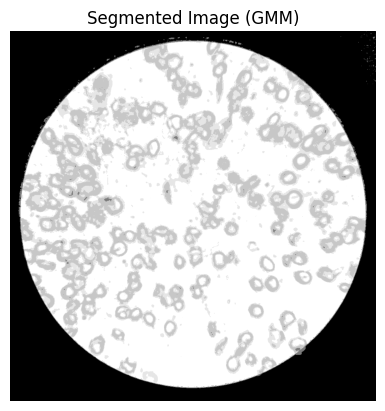

KeyboardInterrupt: 

In [63]:
import cv2
import numpy as np
from sklearn.metrics import f1_score

def generate_binary_mask(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Threshold the grayscale image to generate a binary mask
    ret, binary_mask = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY)
    return binary_mask

# Load the images
image1_path = '1.jpg'
image2_path = '2.jpg'
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Generate binary masks from the images
mask1 = generate_binary_mask(image1)
mask2 = generate_binary_mask(image2)

if mask1.shape != mask2.shape:
    mask1 = cv2.resize(mask1, (mask2.shape[1], mask2.shape[0]))

# Map mask values to binary labels (0 and 255)
mask1 = np.where(mask1 > 0, 255, 0)
mask2 = np.where(mask2 > 0, 255, 0)

# Flatten the masks to 1D
mask1_flat = mask1.flatten()
mask2_flat = mask2.flatten()